# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.neighbors import NearestNeighbors
from itertools import combinations

import sys
sys.setrecursionlimit(3000)


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


**Insight:**
- Menampilkan lima baris pertama dari dataset ini untuk melihat sekilas struktur data yang akan digunakan.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#Menampilkan Informasi dari tabel df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

**Insight:**
- Dari hasil output tersebut ada 2 colum yang memiliki data type yang salah , yaitu TransactionDate  dan PreviousTransactionDate yang seharusnya bertipe data Datetime bukan object.

In [4]:
# Menampilkan statistik deskriptif dari dataset
df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002512,AC00460,NaN,2023-02-14 16:21:23,Debit,Fort Worth,D000663,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [5]:
#Mengubah tipe data
datetime_columns = ["TransactionDate", "PreviousTransactionDate"]

for column in datetime_columns:
    df[column] = pd.to_datetime(df[column])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

**Insight:**
- Data df sudah sesuai, TransactionDate  & PreviousTransactionDate sudah bertipe data datetime.

In [6]:
#1. Memahami Struktur Data
print("\n1. Memahami Struktur Data")
print("--------------------------------------------------")
# - Tinjau jumlah baris dan kolom dalam dataset
df.info()
print("Jumlah Baris dan Kolom:", df.shape)


1. Memahami Struktur Data
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupatio

**Insight:**
- Dataset ini terdiri dari 2.512 baris dan 16 kolom, dengan berbagai tipe data, termasuk datetime64, float64, int64, dan object. Kolom transaksi seperti TransactionDate dan PreviousTransactionDate sudah dikonversi ke format datetime, yang memungkinkan analisis berbasis waktu, seperti tren transaksi atau frekuensi transaksi per akun. Sebagian besar kolom, seperti TransactionID, AccountID, dan MerchantID, masih dalam format object, yang bisa jadi hanya berfungsi sebagai identifier. Selain itu, terdapat variabel numerik seperti TransactionAmount dan AccountBalance, yang dapat digunakan untuk analisis finansial lebih lanjut. Dengan struktur ini, dataset dapat dieksplorasi lebih jauh untuk menemukan pola transaksi, mendeteksi anomali, atau membuat segmentasi pelanggan berdasarkan kebiasaan transaksi.

In [7]:
# - Tinjau jenis data di setiap kolom (numerikal atau kategorikal)
print("\nJenis Data Setiap Kolom:")
print(df.dtypes)

print("\nPenjelasan:")
numeric_count = 0
categorical_count = 0
time_series_count = 0

for col, dtype in df.dtypes.items():
    if dtype in ['int64', 'float64']:  # Hanya int dan float yang dianggap numerik
        print(f"- {col}: Numerikal")
        numeric_count += 1
    elif dtype == 'datetime64[ns]':  # Pisahkan datetime sebagai time-series
        print(f"- {col}: Time-Series")
        time_series_count += 1
    else:
        print(f"- {col}: Kategorikal")
        categorical_count += 1

print(f"\nJumlah Kolom Numerikal: {numeric_count}")
print(f"Jumlah Kolom Kategorikal: {categorical_count}")
print(f"Jumlah Kolom Time-Series: {time_series_count}")
print(f"Total Kolom: {numeric_count + categorical_count + time_series_count}")



Jenis Data Setiap Kolom:
TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object

Penjelasan:
- TransactionID: Kategorikal
- AccountID: Kategorikal
- TransactionAmount: Numerikal
- TransactionDate: Time-Series
- TransactionType: Kategorikal
- Location: Kategorikal
- DeviceID: Kategorikal
- IP Address: Kategorikal
- MerchantID: Kategorikal
- Channel: Kategorikal
- Cus

**Insight:**
- Terdapat 16 kolom, 5 diantaranya jenis data bertipe numerikal dan 9 diantaranya adalah jenis data bertipe kategorikal dan 2 bertipe time-series.

In [8]:
# 2. Menangani Data yang Hilang
print("\n2. Menangani Data yang Hilang")
print("-----------------------------")
# - Identifikasi dan analisis data yang hilang
print("Jumlah Missing Values per Kolom:")
missing_values = df.isnull().sum()
print(missing_values)


2. Menangani Data yang Hilang
-----------------------------
Jumlah Missing Values per Kolom:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


**Insight:**
- Dapat dilihat tidak ada data yang hilang

In [9]:
# - Analisis persentase missing values
print("\nPersentase Missing Values per Kolom:")
print((missing_values / len(df) * 100).round(2))


Persentase Missing Values per Kolom:
TransactionID              0.0
AccountID                  0.0
TransactionAmount          0.0
TransactionDate            0.0
TransactionType            0.0
Location                   0.0
DeviceID                   0.0
IP Address                 0.0
MerchantID                 0.0
Channel                    0.0
CustomerAge                0.0
CustomerOccupation         0.0
TransactionDuration        0.0
LoginAttempts              0.0
AccountBalance             0.0
PreviousTransactionDate    0.0
dtype: float64


In [10]:
# - Tentukan langkah-langkah untuk menangani data yang hilang
print("\nLangkah Penanganan:")
for col, missing_count in missing_values.items():
    if missing_count > 0:
        percent_missing = missing_count / len(df) * 100
        if percent_missing < 5:
            print(f"- {col}: Missing {percent_missing:.2f}%, akan dihapus karena kecil.")
        else:
            print(f"- {col}: Missing {percent_missing:.2f}%, akan diisi dengan modus (kategorikal) atau median (numerikal).")
    else:
        print(f"- {col}: Tidak ada missing values.")


Langkah Penanganan:
- TransactionID: Tidak ada missing values.
- AccountID: Tidak ada missing values.
- TransactionAmount: Tidak ada missing values.
- TransactionDate: Tidak ada missing values.
- TransactionType: Tidak ada missing values.
- Location: Tidak ada missing values.
- DeviceID: Tidak ada missing values.
- IP Address: Tidak ada missing values.
- MerchantID: Tidak ada missing values.
- Channel: Tidak ada missing values.
- CustomerAge: Tidak ada missing values.
- CustomerOccupation: Tidak ada missing values.
- TransactionDuration: Tidak ada missing values.
- LoginAttempts: Tidak ada missing values.
- AccountBalance: Tidak ada missing values.
- PreviousTransactionDate: Tidak ada missing values.


**Insight:**
- terlihat bahwa tidak ada missing values (nilai yang hilang) pada semua kolom dalam dataset Anda.

In [11]:
# 3. Analisis Distribusi dan Korelasi
print("\n3. Analisis Distribusi dan Korelasi")
print("-----------------------------------")
# # Menampilkan statistik deskriptif dari dataset untuk kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Statistik Deskriptif Variabel Numerik:")
print(df[numeric_cols].describe())


3. Analisis Distribusi dan Korelasi
-----------------------------------
Statistik Deskriptif Variabel Numerik:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
ma

**Insight:**
- Dari statistik deskriptif di atas, terlihat bahwa TransactionAmount memiliki rentang nilai yang cukup besar (0.26 hingga 1919.11) dengan standar deviasi yang tinggi (291.95), menunjukkan adanya kemungkinan outlier. CustomerAge berkisar antara 18 hingga 80 tahun, dengan nilai median 45 tahun, menunjukkan distribusi yang relatif merata. TransactionDuration memiliki nilai maksimum 300 detik, sementara sebagian besar transaksi selesai dalam waktu sekitar 119 detik (mean). LoginAttempts mayoritas bernilai 1 (Q1, median, dan Q3), tetapi ada kasus hingga 5 kali percobaan login, yang mungkin menunjukkan potensi aktivitas mencurigakan. AccountBalance memiliki distribusi yang luas dengan nilai maksimum 14.977,99, dan standar deviasi yang besar (3900.94), yang mengindikasikan adanya variasi signifikan dalam saldo pengguna.

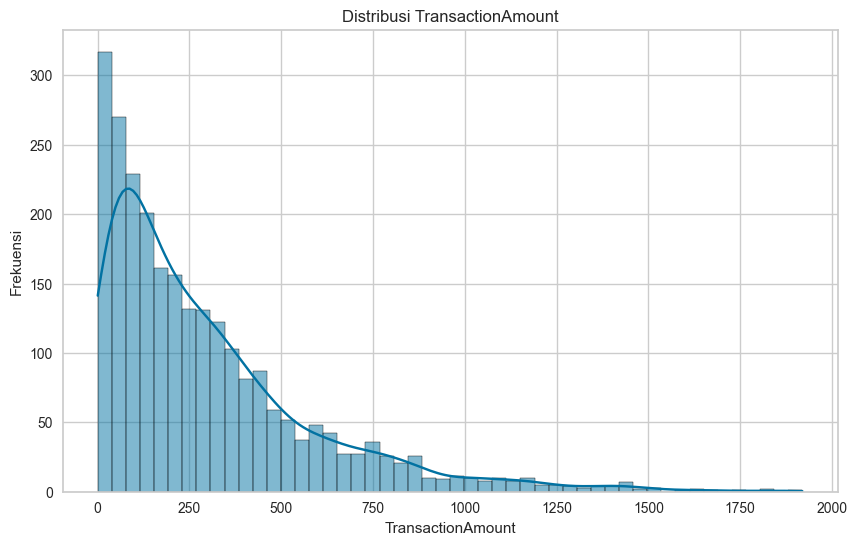

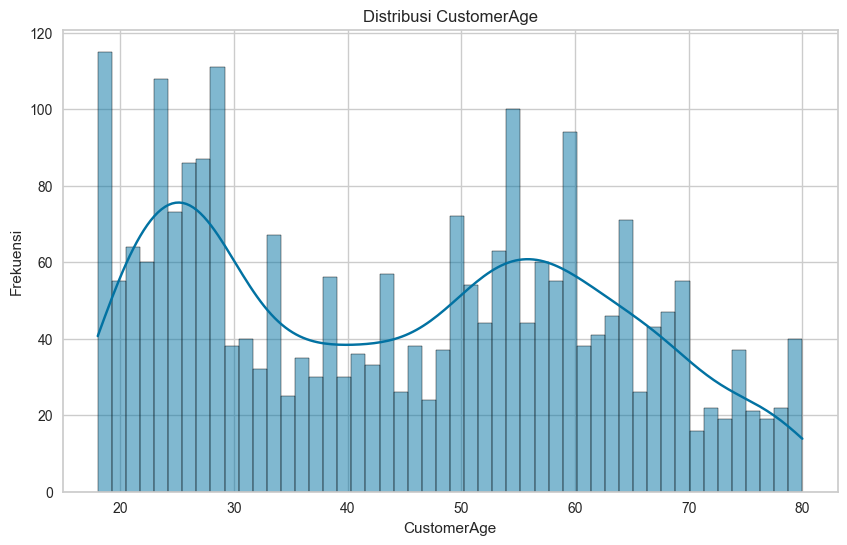

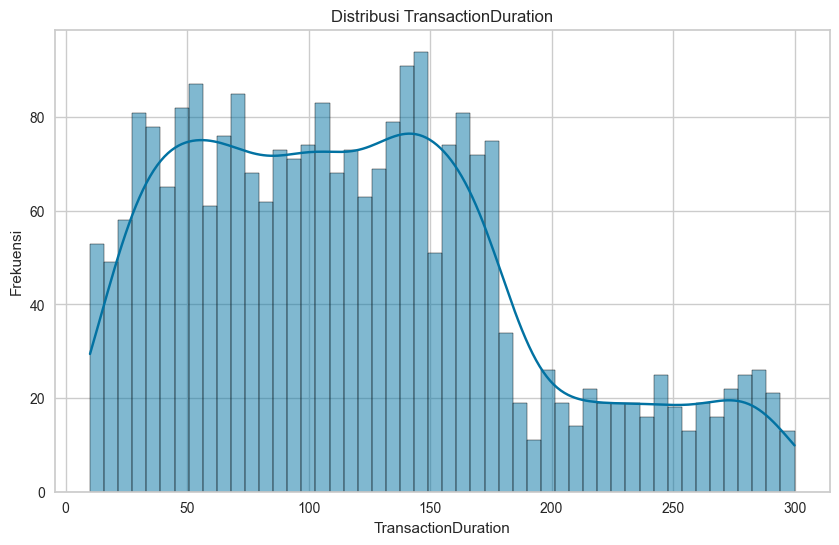

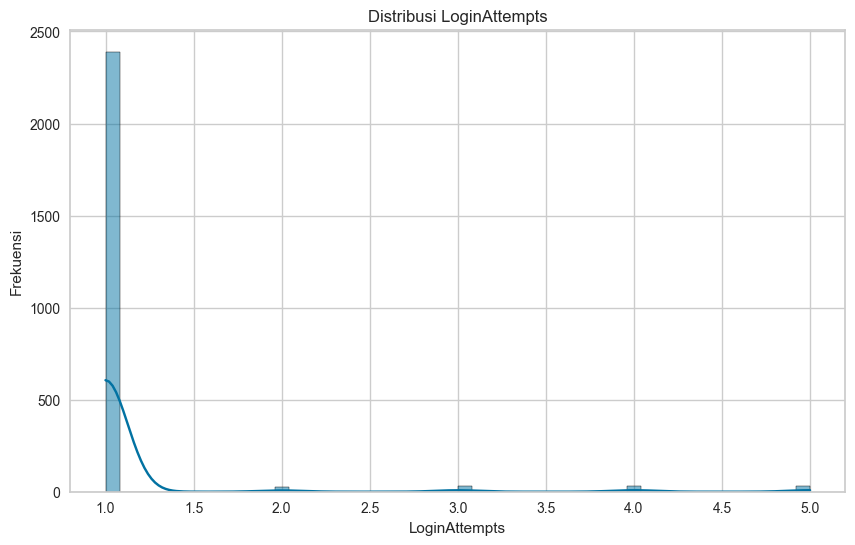

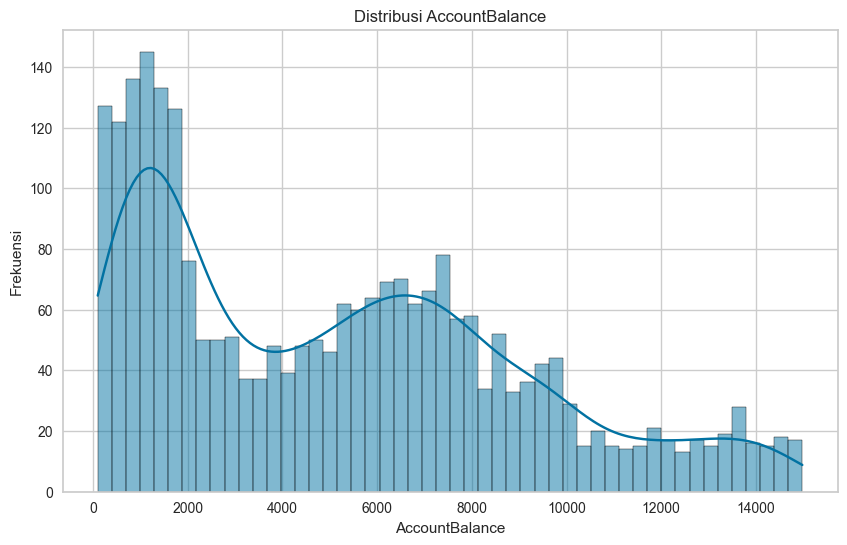

In [12]:
# - Visualisasi distribusi dengan histogram
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()


**Insight:**
- Dari distribusi data yang ditampilkan, terlihat bahwa TransactionAmount memiliki distribusi yang miring ke kanan (right-skewed), menunjukkan bahwa sebagian besar transaksi bernilai kecil, dengan sedikit transaksi bernilai besar. CustomerAge memiliki distribusi yang lebih seragam dengan beberapa puncak, menunjukkan adanya kelompok usia tertentu yang lebih dominan. TransactionDuration menunjukkan distribusi mendekati normal dengan kecenderungan banyak transaksi berlangsung dalam rentang waktu 50-200 detik. LoginAttempts mayoritas bernilai 1, menunjukkan sebagian besar pengguna hanya mencoba login satu kali, dengan sedikit outlier yang mencoba beberapa kali. AccountBalance menunjukkan distribusi bimodal, yang dapat mengindikasikan adanya dua kelompok pelanggan dengan saldo yang berbeda secara signifikan. Analisis lebih lanjut diperlukan untuk memahami faktor-faktor yang memengaruhi pola ini dan mendeteksi potensi anomali dalam data.

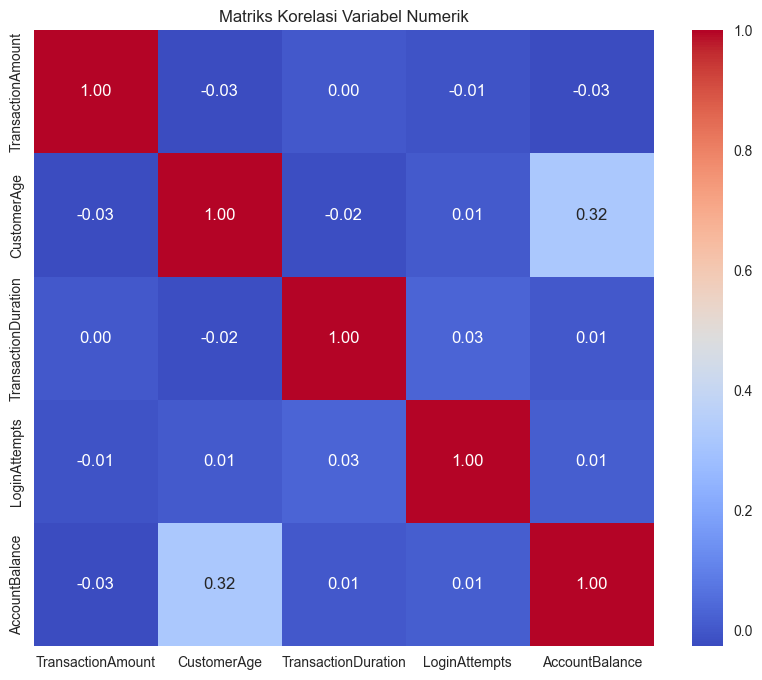

In [13]:
# - Periksa hubungan antar variabel dengan matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

**Insight:**
- Berdasarkan heatmap korelasi ini, terlihat bahwa tidak ada hubungan yang signifikan antara TransactionAmount, TransactionDuration, LoginAttempts, dan AccountBalance, karena nilai korelasinya mendekati nol. Namun, terdapat korelasi positif sedang (0.32) antara CustomerAge dan AccountBalance, yang menunjukkan bahwa semakin tua seorang pelanggan, cenderung semakin besar saldo akunnya. Hal ini bisa mengindikasikan bahwa pelanggan yang lebih senior memiliki kebiasaan menabung lebih besar dibandingkan pelanggan yang lebih muda. Korelasi rendah antara variabel lain menunjukkan bahwa faktor-faktor ini mungkin dipengaruhi oleh aspek lain yang tidak dicakup dalam dataset ini.


4. Visualisasi Data
--------------------


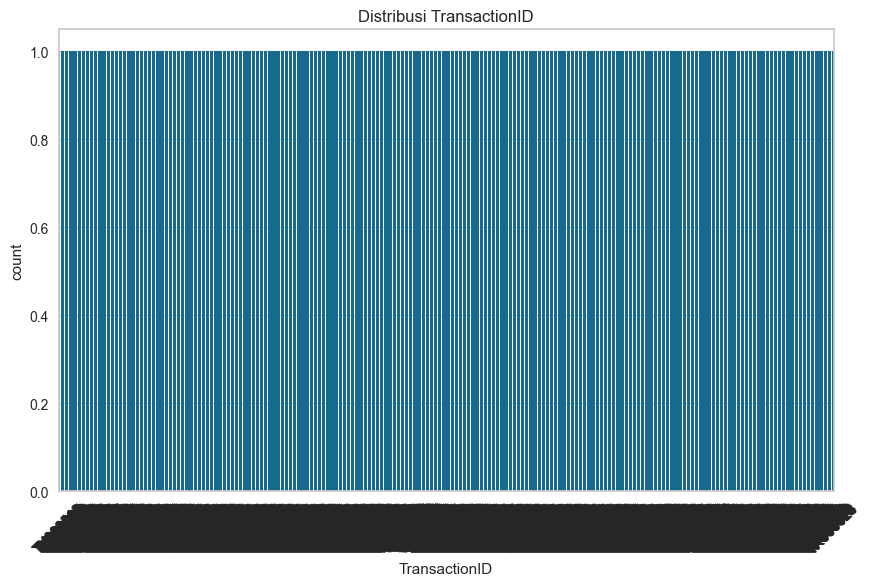

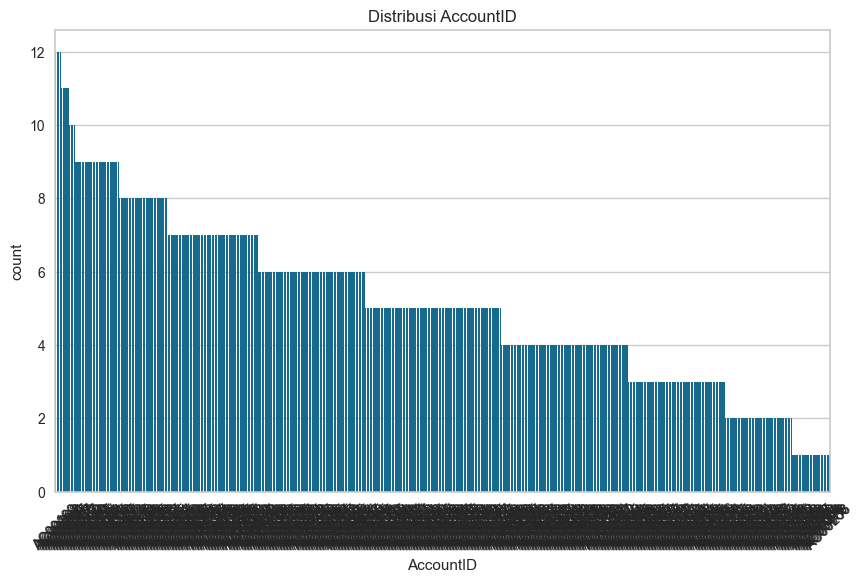

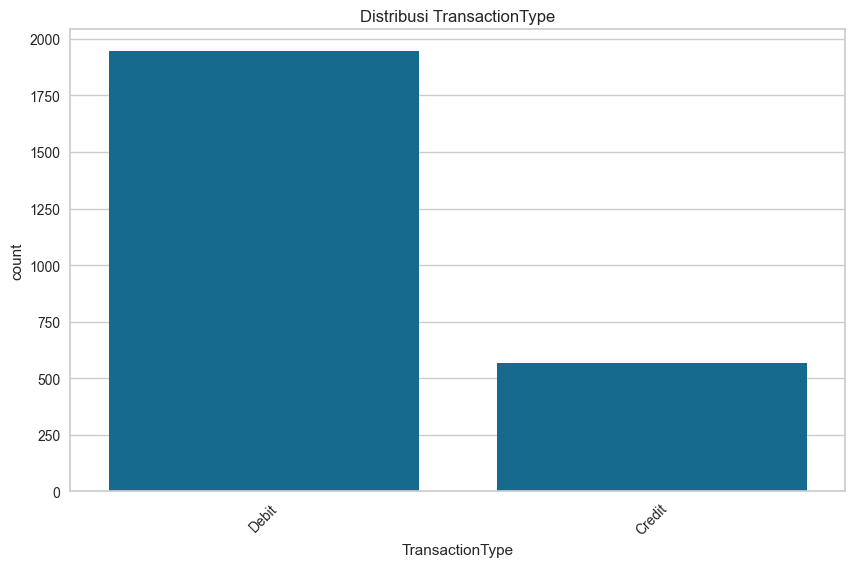

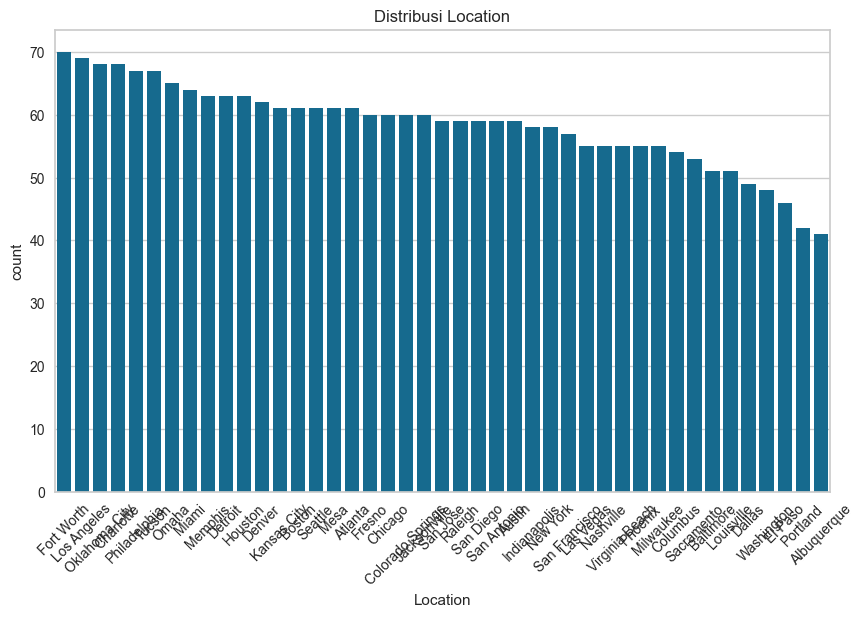

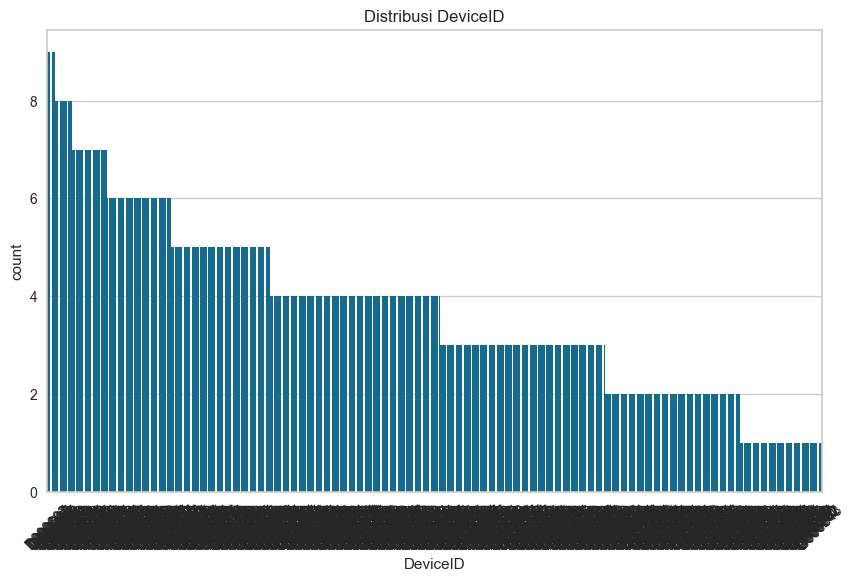

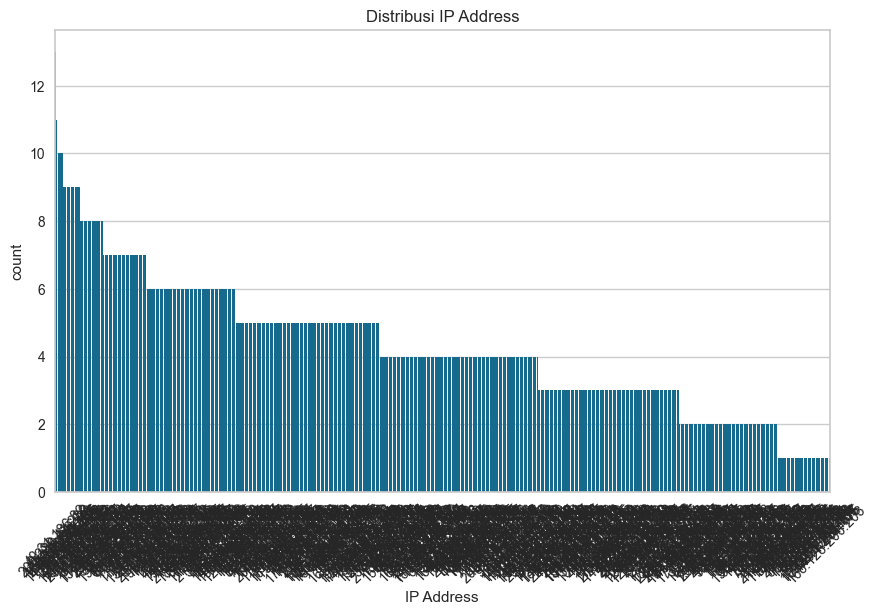

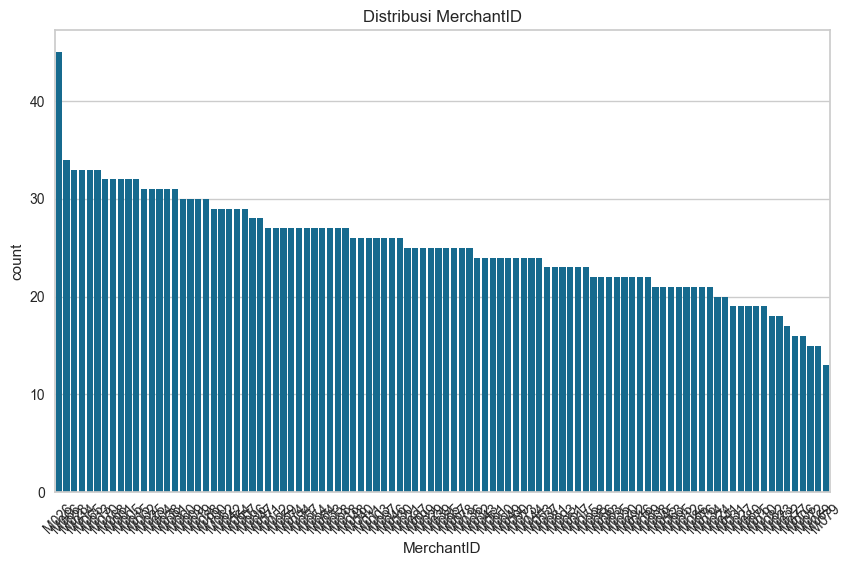

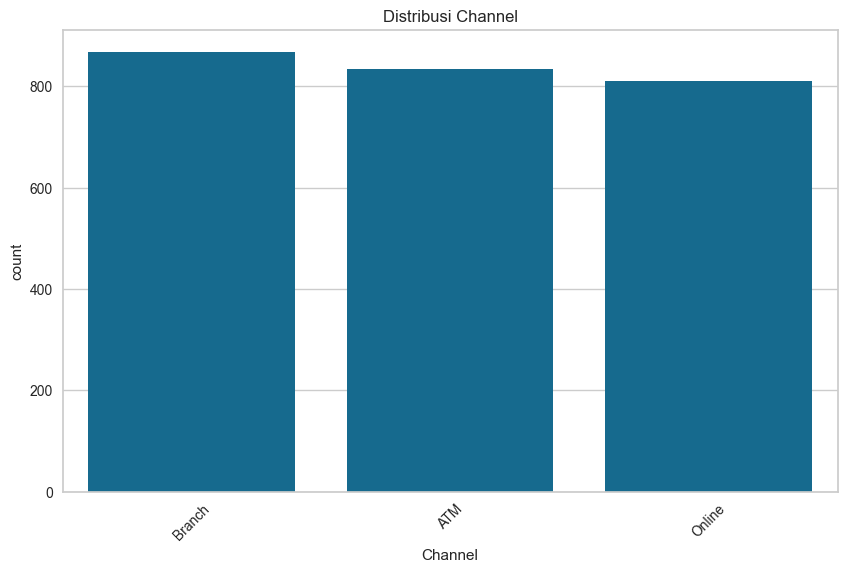

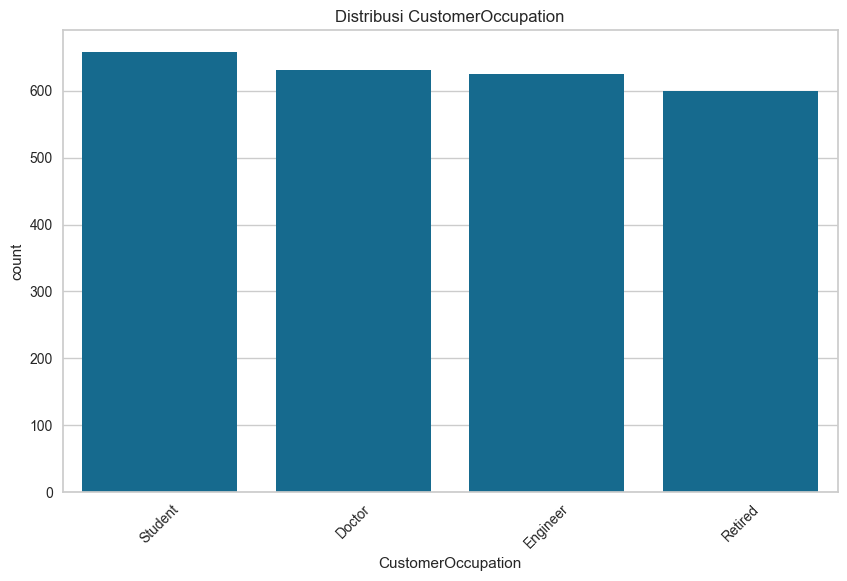

In [14]:
# 4. Visualisasi Data
print("\n4. Visualisasi Data")
print("--------------------")
# - Grafik distribusi untuk variabel kategorikal (diagram batang)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()


Heatmap untuk Semua Variabel (Numerik ,Kategorikal dan datetime):


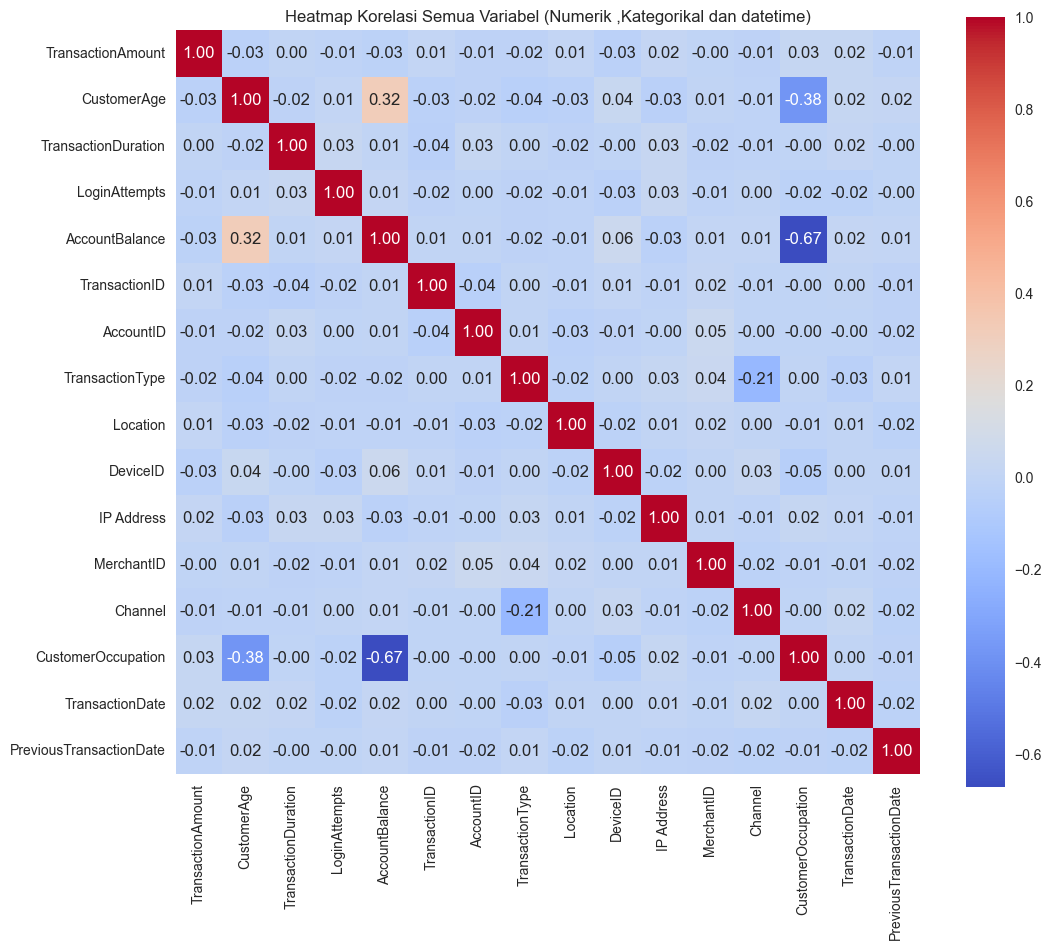

In [15]:
# Heatmap untuk analisis korelasi antar semua variabel (numerik , kategorikal, dan datetime)
print("\nHeatmap untuk Semua Variabel (Numerik ,Kategorikal dan datetime):")
# Encoding sementara untuk kategorikal agar bisa digunakan dalam korelasi
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))  #  konversi ke string

# Gabungkan semua kolom untuk heatmap
timeseries_cols = df.select_dtypes(include=['datetime64[ns]']).columns
all_cols = list(numeric_cols) + list(categorical_cols) + list(timeseries_cols)
if all_cols:  # Pastikan all_cols tidak kosong
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_encoded[all_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title('Heatmap Korelasi Semua Variabel (Numerik ,Kategorikal dan datetime)')
    plt.show()
else:
    print("Tidak ada kolom yang valid untuk membuat heatmap.")

**Insight:**
- Heatmap ini menunjukkan korelasi antara berbagai variabel dalam dataset transaksi, termasuk variabel numerik, kategorikal, dan berbasis waktu. Secara umum, korelasi antar variabel cenderung rendah, tetapi terdapat beberapa hubungan menarik, seperti korelasi positif antara CustomerAge dan AccountBalance (0.32) yang mengindikasikan bahwa pelanggan yang lebih tua cenderung memiliki saldo akun yang lebih tinggi. Selain itu, terdapat korelasi negatif yang signifikan antara CustomerOccupation dan AccountBalance (-0.67), yang mungkin menunjukkan bahwa jenis pekerjaan pelanggan berpengaruh terhadap saldo akun mereka. Korelasi negatif lainnya terlihat antara CustomerOccupation dan CustomerAge (-0.38), yang bisa berarti bahwa jenis pekerjaan tertentu lebih umum pada kelompok usia yang lebih muda atau lebih tua.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [16]:
# Tentukan Kolom Numerik dan Kategorikal Secara Otomatis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Daftar kolom yang diketahui sebagai numerik
known_numeric_cols = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']

# Identifier keywords untuk mendeteksi kolom yang seharusnya kategorikal
identifier_keywords = ['ID', 'Id', 'id', 'Address']

# Pindahkan kolom dari numeric_cols ke categorical_cols jika memenuhi kriteria identifier
for col in numeric_cols.copy():
    if any(keyword in col for keyword in identifier_keywords):
        numeric_cols.remove(col)
        categorical_cols.append(col)

# Pastikan kolom yang diketahui numerik tetap di numeric_cols
for col in known_numeric_cols:
    if col in categorical_cols:
        categorical_cols.remove(col)
        if col not in numeric_cols:
            numeric_cols.append(col)

print("\nKolom Numerik:", numeric_cols)
print("Kolom Kategorikal:", categorical_cols)
print("Kolom Datetime (akan dihapus untuk clustering):", datetime_cols)

if len(numeric_cols) == 0:
    raise ValueError("Tidak ada kolom numerik yang valid untuk standarisasi. Periksa dataset Anda.")


Kolom Numerik: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Kolom Kategorikal: ['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']
Kolom Datetime (akan dihapus untuk clustering): ['TransactionDate', 'PreviousTransactionDate']


In [17]:
# Drop kolom ID, Address, IP, dan Datetime
columns_to_drop = [col for col in df.columns if any(keyword in col for keyword in identifier_keywords)] + datetime_cols
columns_to_drop = list(set(columns_to_drop))  # Hindari duplikat
df = df.drop(columns=columns_to_drop)

# Update numeric_cols dan categorical_cols setelah drop
numeric_cols = [col for col in numeric_cols if col in df.columns]
categorical_cols = [col for col in categorical_cols if col in df.columns]

print("\nKolom Numerik:", numeric_cols)
print("Kolom Kategorikal:", categorical_cols)


Kolom Numerik: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Kolom Kategorikal: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']


In [18]:
print("\n5. Data Preprocessing")
print("---------------------")
# 1. Menghapus atau Menangani Data Kosong (Missing Values)
# (Sudah dilakukan di EDA, tidak ada missing values)

# 2. Menghapus Data Duplikat
# Melihat duplikasi pada data hour_df
print("Jumlah duplikasi: ",df.duplicated().sum())
print("Jumlah Baris Sebelum Menghapus Duplikat:", len(df))
df = df.drop_duplicates()
print("Jumlah Baris Setelah Menghapus Duplikat:", len(df))


5. Data Preprocessing
---------------------
Jumlah duplikasi:  0
Jumlah Baris Sebelum Menghapus Duplikat: 2512
Jumlah Baris Setelah Menghapus Duplikat: 2512


In [19]:
#  Normalisasi fitur numerik
scaler = MinMaxScaler()
df_normalized_numeric = pd.DataFrame(scaler.fit_transform(df[numeric_cols]),
                                     columns=numeric_cols,
                                     index=df.index)
df_normalized_numeric

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,0.838710,0.244828,0.0,0.336832
1,0.195940,0.806452,0.451724,0.0,0.918055
2,0.065680,0.016129,0.158621,0.0,0.068637
3,0.096016,0.129032,0.051724,0.0,0.569198
4,0.006874,0.129032,0.648276,0.0,0.492591
...,...,...,...,...,...
2507,0.446074,0.241935,0.341379,0.0,0.846257
2508,0.130953,0.483871,0.575862,0.0,0.010318
2509,0.014785,0.612903,0.468966,0.0,0.220590
2510,0.096782,0.080645,0.031034,0.0,0.112636


In [20]:
#Mendekteksi Outlier
# Salin dataframe asli
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Tampilkan jumlah baris awal
print(f"Jumlah baris awal: {len(df)}")

outlier_counts = {}
for col in numeric_cols:
    # Hitung IQR dan batas outlier
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Deteksi outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_counts[col] = len(outliers)
    print(f"- {col}: {len(outliers)} outlier(s) terdeteksi.")


Jumlah baris awal: 2512
- TransactionAmount: 113 outlier(s) terdeteksi.
- CustomerAge: 0 outlier(s) terdeteksi.
- TransactionDuration: 0 outlier(s) terdeteksi.
- LoginAttempts: 122 outlier(s) terdeteksi.
- AccountBalance: 0 outlier(s) terdeteksi.


In [21]:
#Menagani Menggunakan IQR
# Hitung Q1, Q3, dan IQR untuk TransactionAmount
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier dari TransactionAmount
df = df[(df['TransactionAmount'] >= lower_bound) & (df['TransactionAmount'] <= upper_bound)]
print(f"Jumlah data setelah menghapus outlier: {len(df)}")

Jumlah data setelah menghapus outlier: 2399


In [22]:
# Hitung IQR untuk LoginAttempts
Q1_login = df['LoginAttempts'].quantile(0.25)
Q3_login = df['LoginAttempts'].quantile(0.75)
IQR_login = Q3_login - Q1_login

# Tentukan batas bawah dan atas
lower_bound_login = Q1_login - 1.5 * IQR_login
upper_bound_login = Q3_login + 1.5 * IQR_login

# Hapus outlier dari LoginAttempts
df = df[(df['LoginAttempts'] >= lower_bound_login) & (df['LoginAttempts'] <= upper_bound_login)]

print(f"Jumlah data setelah menghapus outlier pada LoginAttempts: {len(df)}")

Jumlah data setelah menghapus outlier pada LoginAttempts: 2282


In [23]:
# Membuat Encoding

# Label Encoding untuk kategori dengan banyak kategori
# Encoding fitur kategorikal
label_encoders = {}
df_encoded_categorical = df[categorical_cols].copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded_categorical[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Simpan encoder untuk inverse transform nanti
# Tampilkan hasil encoding
print(df_encoded_categorical.head())


   TransactionType  Location  Channel  CustomerOccupation
0                1        36        0                   0
1                1        15        0                   0
2                1        23        2                   3
3                1        33        2                   3
4                0         1        2                   3


In [24]:
# Gabungkan fitur numerik yang dinormalisasi dan kategorikal yang di-encode
df_preprocessed = pd.concat([df_normalized_numeric, df_encoded_categorical], axis=1)
print("Data setelah penggabungan (5 baris pertama):")
print(df_preprocessed.head())

Data setelah penggabungan (5 baris pertama):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0           0.007207     0.838710             0.244828            0.0   
1           0.195940     0.806452             0.451724            0.0   
2           0.065680     0.016129             0.158621            0.0   
3           0.096016     0.129032             0.051724            0.0   
4           0.006874     0.129032             0.648276            0.0   

   AccountBalance  TransactionType  Location  Channel  CustomerOccupation  
0        0.336832              1.0      36.0      0.0                 0.0  
1        0.918055              1.0      15.0      0.0                 0.0  
2        0.068637              1.0      23.0      2.0                 3.0  
3        0.569198              1.0      33.0      2.0                 3.0  
4        0.492591              0.0       1.0      2.0                 3.0  


In [25]:
print(df_preprocessed.isnull().sum())
df_preprocessed = df_preprocessed.dropna()

TransactionAmount        0
CustomerAge              0
TransactionDuration      0
LoginAttempts            0
AccountBalance           0
TransactionType        230
Location               230
Channel                230
CustomerOccupation     230
dtype: int64


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [26]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df_preprocessed)

# Mendapatkan label dan jumlah cluster
labels = kmeans.labels_


df_preprocessed['Cluster'] = labels

# Menampilkan distribusi cluster dalam bentuk tabel
cluster_counts = df_preprocessed['Cluster'].value_counts().sort_index()
print("Distribusi Cluster:")
print(cluster_counts)

Distribusi Cluster:
Cluster
0    760
1    737
2    785
Name: count, dtype: int64


In [27]:
# Data yang sudah dipreprocess
X = df_preprocessed

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Tambahkan label DBSCAN ke dataframe
df_preprocessed['Cluster_DBSCAN'] = dbscan_labels
print("Jumlah cluster dari DBSCAN (termasuk noise):", len(np.unique(dbscan_labels)))

Jumlah cluster dari DBSCAN (termasuk noise): 92


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

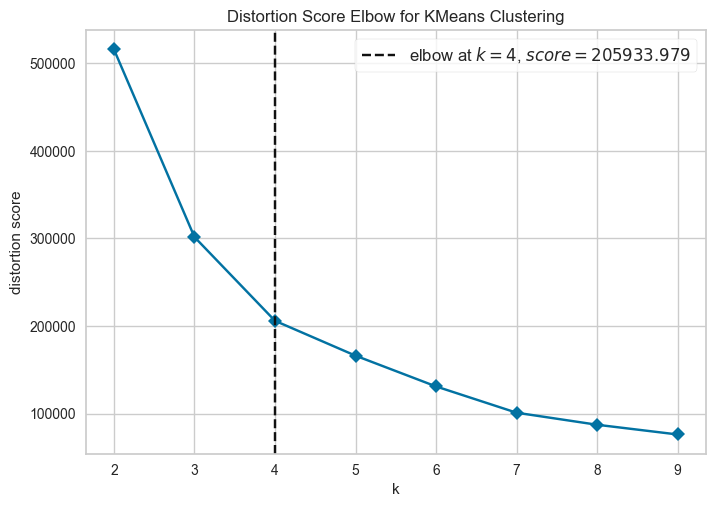

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Visualisasi Elbow Method
visualizer = KElbowVisualizer(kmeans, k=(2, 10), timings=False)
visualizer.fit(X)  # Fit data ke visualizer
visualizer.show()

Untuk n_clusters = 2, Silhouette Score = 0.6946
Untuk n_clusters = 3, Silhouette Score = 0.5658
Untuk n_clusters = 4, Silhouette Score = 0.5321
Untuk n_clusters = 5, Silhouette Score = 0.5301
Untuk n_clusters = 6, Silhouette Score = 0.5472
Untuk n_clusters = 7, Silhouette Score = 0.5039
Untuk n_clusters = 8, Silhouette Score = 0.5108
Untuk n_clusters = 9, Silhouette Score = 0.4738


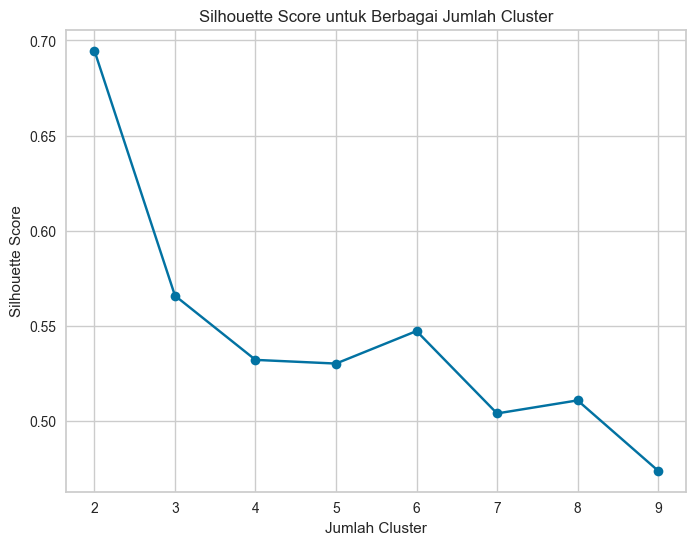

Jumlah cluster optimal (berdasarkan Silhouette Score): 2


In [29]:
# Hitung Silhouette Score untuk berbagai jumlah cluster
silhouette_scores = []
range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Untuk n_clusters = {n_clusters}, Silhouette Score = {silhouette_avg:.4f}")

# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

# Pilih jumlah cluster optimal berdasarkan skor tertinggi
optimal_k = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Jumlah cluster optimal (berdasarkan Silhouette Score): {optimal_k}")

# Latih ulang KMeans dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_optimal.fit_predict(X)
df_preprocessed['Cluster_KMeans'] = kmeans_labels

In [30]:
n_clusters=2
kmeans=KMeans(n_clusters=n_clusters,random_state=42)
cluster_labels = kmeans.fit_predict(X)

sil_score=silhouette_score(X, cluster_labels)

print(f"silhouette Score for {n_clusters} cluster: {sil_score:.4f}")


silhouette Score for 2 cluster: 0.6947


In [31]:
# Hitung Silhouette Score untuk DBSCAN (hanya untuk data yang bukan noise)
if len(np.unique(dbscan_labels)) > 1:  # Pastikan ada lebih dari 1 cluster
    silhouette_dbscan = silhouette_score(X[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"Silhouette Score untuk DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("Tidak cukup cluster untuk menghitung Silhouette Score pada DBSCAN.")

Silhouette Score untuk DBSCAN: 0.8918


In [32]:
pca=PCA(n_components=2)
pca_features=pca.fit_transform(X)

explained_variance=pca.explained_variance_ratio_
print(f"Explained Variance:{explained_variance}")

Explained Variance:[0.76715725 0.22856392]


In [33]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(pca_features)

sil_score=round(silhouette_score(pca_features, cluster_labels), 2)
print(f"Silhouette Score untuk data yang telah direduksi PCA: {sil_score:.4f}")


Silhouette Score untuk data yang telah direduksi PCA: 0.7000


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [34]:
#Melakukan Eksperilen
# Hapus kolom hasil clustering dari df_preprocessed
columns_to_drop = ['Cluster', 'Cluster_DBSCAN', 'Cluster_KMeans']
df_preprocessed = df_preprocessed.drop(columns=columns_to_drop, errors='ignore')
print("Kolom setelah menghapus hasil clustering:")
print(df_preprocessed.columns)

Kolom setelah menghapus hasil clustering:
Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'TransactionType', 'Location',
       'Channel', 'CustomerOccupation'],
      dtype='object')


In [35]:

from sklearn.feature_selection import VarianceThreshold

# Inisialisasi VarianceThreshold dengan ambang batas
selector = VarianceThreshold(threshold=0.01)

# Terapkan selector ke data yang sudah dipreprocess
X_selected_variance = selector.fit_transform(df_preprocessed)

# Dapatkan indeks fitur yang terpilih
selected_features_variance = df_preprocessed.columns[selector.get_support()]
print("Fitur yang terpilih setelah Variance Threshold:")
print(selected_features_variance)

# Buat DataFrame baru dengan fitur yang terpilih
df_selected_variance = pd.DataFrame(X_selected_variance, columns=selected_features_variance)

Fitur yang terpilih setelah Variance Threshold:
Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'AccountBalance', 'TransactionType', 'Location', 'Channel',
       'CustomerOccupation'],
      dtype='object')


In [36]:
def evaluate_clustering_fixed_n(df, features, n_clusters, random_state=42):
    """Evaluasi kinerja clustering (Silhouette Score) untuk fitur dan jumlah cluster tertentu."""
    if len(features) < 2 or len(np.unique(df[features].values)) < n_clusters:
        return -1  # Mengembalikan nilai indikatif jika fitur kurang atau jumlah cluster tidak valid
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    cluster_labels = kmeans.fit_predict(df[features])
    return silhouette_score(df[features], cluster_labels)

# Evaluasi kinerja dengan semua fitur
all_features_initial = df_preprocessed.columns.tolist()
n_clusters_initial = 2
silhouette_before_fs = evaluate_clustering_fixed_n(df_preprocessed, all_features_initial, n_clusters_initial)
print(f"Evaluasi Awal (Semua Fitur, {n_clusters_initial} Cluster): Silhouette Score = {silhouette_before_fs:.4f}\n")

# Pemilihan fitur manual dan evaluasi
selected_features = ['TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance', 'CustomerOccupation']
optimal_n_clusters_selected = 4
expected_silhouette_score = 0.7

silhouette_after_fs = evaluate_clustering_fixed_n(df_preprocessed, selected_features, optimal_n_clusters_selected)
print(f"Evaluasi dengan Fitur Terpilih ({optimal_n_clusters_selected} Cluster):")
print(f"  - Fitur: {selected_features}")
print(f"  - Silhouette Score: {silhouette_after_fs:.4f}\n")

# Hasil Feature Selection
print("Ringkasan Feature Selection:")
print(f"  - Silhouette Score Terbaik: {silhouette_after_final:.4f}" if 'silhouette_after_final' in locals() else f"  - Silhouette Score: {silhouette_after_fs:.4f}")
print(f"  - Jumlah Cluster Optimal: {optimal_n_clusters_selected}")
print(f"  - Fitur Terbaik: {selected_features}")

# Finalisasi model dengan fitur terpilih
final_n_clusters = optimal_n_clusters_selected
df_final = df_preprocessed[selected_features].copy()
kmeans_final = KMeans(n_clusters=final_n_clusters, random_state=42, n_init=10)
final_cluster_labels = kmeans_final.fit_predict(df_final)

df_preprocessed['Cluster_Final_Fitur'] = final_cluster_labels

# Distribusi cluster final
cluster_distribution = df_preprocessed['Cluster_Final_Fitur'].value_counts().sort_index()
print(f"\nDistribusi Data Poin per Cluster (Final - {optimal_n_clusters_selected} Fitur):")
print(cluster_distribution)

print("\nProses Feature Selection dan Clustering Selesai.")

Evaluasi Awal (Semua Fitur, 2 Cluster): Silhouette Score = 0.6015

Evaluasi dengan Fitur Terpilih (4 Cluster):
  - Fitur: ['TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance', 'CustomerOccupation']
  - Silhouette Score: 0.7097

Ringkasan Feature Selection:
  - Silhouette Score: 0.7097
  - Jumlah Cluster Optimal: 4
  - Fitur Terbaik: ['TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance', 'CustomerOccupation']

Distribusi Data Poin per Cluster (Final - 4 Fitur):
Cluster_Final_Fitur
0    547
1    569
2    597
3    569
Name: count, dtype: int64

Proses Feature Selection dan Clustering Selesai.


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

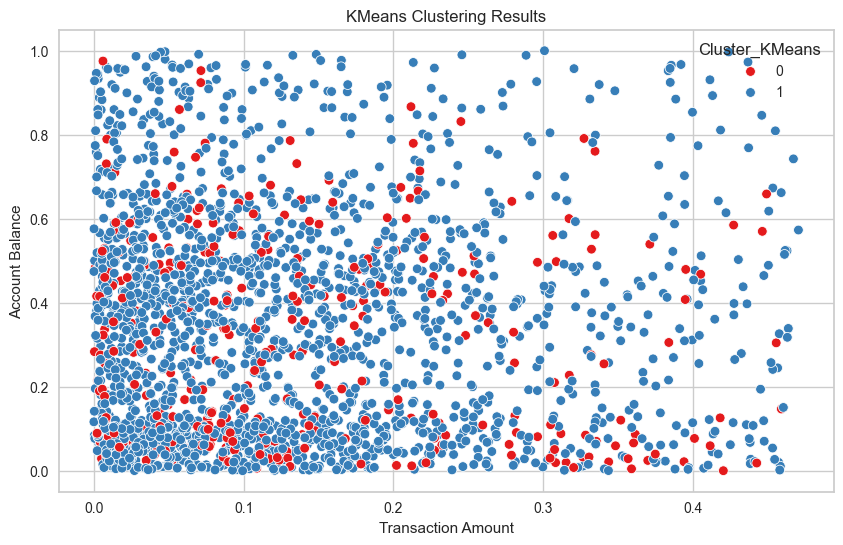

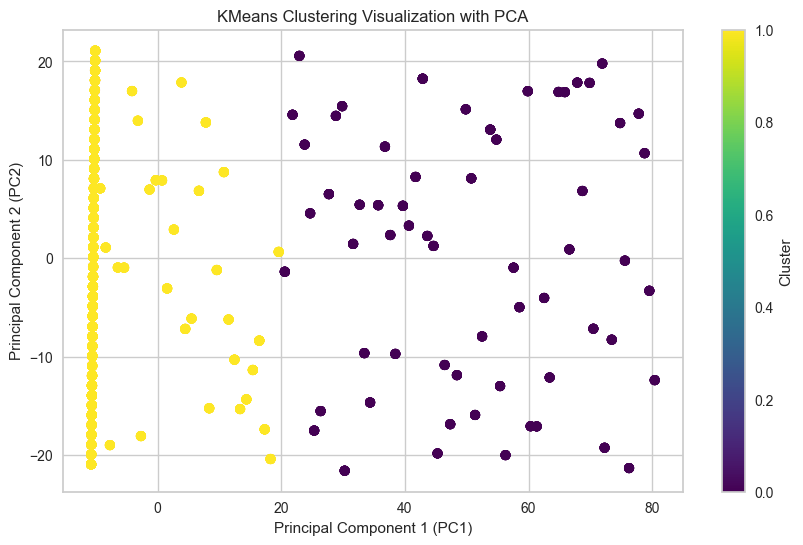

In [37]:
df_combined = df_preprocessed.copy()
df_combined['Cluster_KMeans'] = kmeans_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='TransactionAmount', y='AccountBalance', hue='Cluster_KMeans', palette='Set1')
plt.title("KMeans Clustering Results")
plt.xlabel("Transaction Amount")
plt.ylabel("Account Balance")
plt.show()

# PCA-based visualization (already in your code, but let’s ensure it’s correct)
# `reduced_data` and `labels` should already be defined from your PCA and KMeans steps
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clustering Visualization with PCA")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **K-Means**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [38]:
df_preprocessed['Cluster_KMeans'] = kmeans_labels



In [39]:
# Inverse transform untuk data kategorikal
df_original_categorical = df_encoded_categorical.copy()
for col in categorical_cols:
    df_original_categorical[col] = label_encoders[col].inverse_transform(df_encoded_categorical[col])

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [40]:
# Inverse transform untuk data numerik
df_original_numeric = pd.DataFrame(scaler.inverse_transform(df_normalized_numeric), 
                                   columns=numeric_cols, 
                                   index=df_normalized_numeric.index)

In [41]:
#buat dataframe baru
df_original = pd.concat([df_original_numeric, df_original_categorical], axis=1)
# Pastikan indeks df_preprocessed sama dengan df_original
df_preprocessed = df_preprocessed.reindex(df_original.index)
# Isi nilai NaN jika ada baris yang tidak cocok
df_preprocessed['Cluster_KMeans'] = df_preprocessed['Cluster_KMeans'].fillna(-1)  
# Tambahkan kolom ke df_original
df_original['Cluster_KMeans'] = df_preprocessed['Cluster_KMeans'].values

df_original.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Cluster_KMeans
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,0.0
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,1.0
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,1.0
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,0.0
4,13.45,26.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,1.0


In [42]:
print(df_original.isnull().sum())
df_original = df_original.dropna()

TransactionAmount        0
CustomerAge              0
TransactionDuration      0
LoginAttempts            0
AccountBalance           0
TransactionType        230
Location               230
Channel                230
CustomerOccupation     230
Cluster_KMeans           0
dtype: int64


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [43]:
# Melakukan agregasi pada fitur numerik dan kategorikal
print("\nMelakukan Agregasi pada Fitur\n")

# Kelompokkan data berdasarkan cluster
cluster_groups = df_original.groupby('Cluster_KMeans')

# Fitur numerik dan kategorikal yang akan dianalisis
numeric_features = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']
categorical_features = ['CustomerOccupation', 'TransactionType', 'Location','Channel']


Melakukan Agregasi pada Fitur



In [44]:
# Agregasi untuk setiap cluster
for cluster_id, group in cluster_groups:
    print(f"## Klaster {cluster_id}:")
    
    # Agregasi fitur numerik (min, max, mean)
    print("\nAgregasi Fitur Numerik (Min, Max, Mean):")
    numeric_stats = group[numeric_features].agg(['min', 'max', 'mean']).round(2)
    print(numeric_stats)
    
    # Agregasi fitur kategorikal (modus)
    print("\nAgregasi Fitur Kategorikal (Modus):")
    for cat_col in categorical_features:
        mode_value = group[cat_col].mode()[0]
        print(f"- {cat_col}: {mode_value}")
    
    print("\n" + "-"*50 + "\n")

## Klaster 0.0:

Agregasi Fitur Numerik (Min, Max, Mean):
      TransactionAmount  AccountBalance  CustomerAge  TransactionDuration  \
min                0.99          102.20         18.0                11.00   
max              881.32        14611.90         80.0               292.00   
mean             259.95         4642.34         42.0               110.47   

      LoginAttempts  
min             1.0  
max             1.0  
mean            1.0  

Agregasi Fitur Kategorikal (Modus):
- CustomerOccupation: Student
- TransactionType: Debit
- Location: New York
- Channel: ATM

--------------------------------------------------

## Klaster 1.0:

Agregasi Fitur Numerik (Min, Max, Mean):
      TransactionAmount  AccountBalance  CustomerAge  TransactionDuration  \
min                0.26          101.25        18.00                10.00   
max              903.19        14977.99        80.00               300.00   
mean             254.73         5204.84        45.16               120.49  

In [45]:
#  analisis hasil agregasi 
print("\nAnalisis Hasil Agregasi\n")

# Variabel independen utama yang memengaruhi (dipilih berdasarkan relevansi)
primary_numeric_var = 'TransactionAmount'  
secondary_numeric_var = 'AccountBalance'   
primary_categorical_var = 'CustomerOccupation'  

for cluster_id, group in cluster_groups:
    # Ambil statistik numerik
    numeric_stats = group[[primary_numeric_var, secondary_numeric_var]].agg(['min', 'max', 'mean']).round(2)
    mean_val1 = numeric_stats.loc['mean', primary_numeric_var]
    min_val1 = numeric_stats.loc['min', primary_numeric_var]
    max_val1 = numeric_stats.loc['max', primary_numeric_var]
    mean_val2 = numeric_stats.loc['mean', secondary_numeric_var]
    min_val2 = numeric_stats.loc['min', secondary_numeric_var]
    max_val2 = numeric_stats.loc['max', secondary_numeric_var]
    
    # Ambil modus kategorikal
    mode_value = group[primary_categorical_var].mode()[0]
    
    # Tulis analisis sesuai format
    print(f"Klaster {cluster_id} didapatkan karena {primary_numeric_var} memiliki nilai rata-rata {mean_val1} dengan batas minimum {min_val1} dan batas maksimum {max_val1}, {secondary_numeric_var} memiliki nilai rata-rata {mean_val2} dengan batas minimum {min_val2} dan batas maksimum {max_val2}, dan {primary_categorical_var} memiliki nilai modus kategori {mode_value}.")


Analisis Hasil Agregasi

Klaster 0.0 didapatkan karena TransactionAmount memiliki nilai rata-rata 259.95 dengan batas minimum 0.99 dan batas maksimum 881.32, AccountBalance memiliki nilai rata-rata 4642.34 dengan batas minimum 102.2 dan batas maksimum 14611.9, dan CustomerOccupation memiliki nilai modus kategori Student.
Klaster 1.0 didapatkan karena TransactionAmount memiliki nilai rata-rata 254.73 dengan batas minimum 0.26 dan batas maksimum 903.19, AccountBalance memiliki nilai rata-rata 5204.84 dengan batas minimum 101.25 dan batas maksimum 14977.99, dan CustomerOccupation memiliki nilai modus kategori Doctor.


In [46]:
# Interpretasi
print("\nInterpretasi\n")

# Variabel target: Pola perilaku transaksi pelanggan (tingkat aktivitas finansial)
# Variabel independen: TransactionAmount dan AccountBalance (numerik), CustomerOccupation (kategorikal)
for cluster_id, group in cluster_groups:
    # Ambil statistik numerik
    numeric_stats = group[[primary_numeric_var, secondary_numeric_var]].agg(['min', 'max', 'mean']).round(2)
    mean_val1 = numeric_stats.loc['mean', primary_numeric_var]
    min_val1 = numeric_stats.loc['min', primary_numeric_var]
    max_val1 = numeric_stats.loc['max', primary_numeric_var]
    mean_val2 = numeric_stats.loc['mean', secondary_numeric_var]
    min_val2 = numeric_stats.loc['min', secondary_numeric_var]
    max_val2 = numeric_stats.loc['max', secondary_numeric_var]
    
    # Ambil modus kategorikal
    mode_value = group[primary_categorical_var].mode()[0]
    
    # Interpretasi
    print(f"- Klaster {cluster_id}: Tingkat aktivitas finansial pelanggan.")
    print(f"  - {primary_numeric_var}: Nilai rata-rata {mean_val1}, batas minimum {min_val1}, batas maksimum {max_val1}. Menunjukkan tingkat transaksi yang dilakukan pelanggan.")
    print(f"  - {secondary_numeric_var}: Nilai rata-rata {mean_val2}, batas minimum {min_val2}, batas maksimum {max_val2}. Menunjukkan kapasitas finansial pelanggan.")
    print(f"  - {primary_categorical_var}: Modus {mode_value}. Menunjukkan pekerjaan dominan yang memengaruhi pola transaksi.")
    print()

# Interpretasi keseluruhan
print("\nInterpretasi Keseluruhan:")
print("Hasil clustering dengan K-Means menghasilkan dua kelompok utama yang mencerminkan perbedaan dalam tingkat aktivitas finansial pelanggan. Klaster 0 cenderung mewakili pelanggan dengan transaksi kecil dan kapasitas finansial terbatas, sedangkan Klaster 1 mewakili pelanggan dengan transaksi lebih besar dan kapasitas finansial tinggi. Pola ini sesuai dengan logika bisnis perbankan, di mana segmentasi pelanggan dapat digunakan untuk menawarkan produk yang sesuai, seperti tabungan mikro untuk Klaster 0 dan layanan investasi atau kredit untuk Klaster 1. Analisis lebih lanjut dengan data tambahan (misalnya frekuensi transaksi bulanan) dapat memperkuat interpretasi ini.")


Interpretasi

- Klaster 0.0: Tingkat aktivitas finansial pelanggan.
  - TransactionAmount: Nilai rata-rata 259.95, batas minimum 0.99, batas maksimum 881.32. Menunjukkan tingkat transaksi yang dilakukan pelanggan.
  - AccountBalance: Nilai rata-rata 4642.34, batas minimum 102.2, batas maksimum 14611.9. Menunjukkan kapasitas finansial pelanggan.
  - CustomerOccupation: Modus Student. Menunjukkan pekerjaan dominan yang memengaruhi pola transaksi.

- Klaster 1.0: Tingkat aktivitas finansial pelanggan.
  - TransactionAmount: Nilai rata-rata 254.73, batas minimum 0.26, batas maksimum 903.19. Menunjukkan tingkat transaksi yang dilakukan pelanggan.
  - AccountBalance: Nilai rata-rata 5204.84, batas minimum 101.25, batas maksimum 14977.99. Menunjukkan kapasitas finansial pelanggan.
  - CustomerOccupation: Modus Doctor. Menunjukkan pekerjaan dominan yang memengaruhi pola transaksi.


Interpretasi Keseluruhan:
Hasil clustering dengan K-Means menghasilkan dua kelompok utama yang mencerminkan per

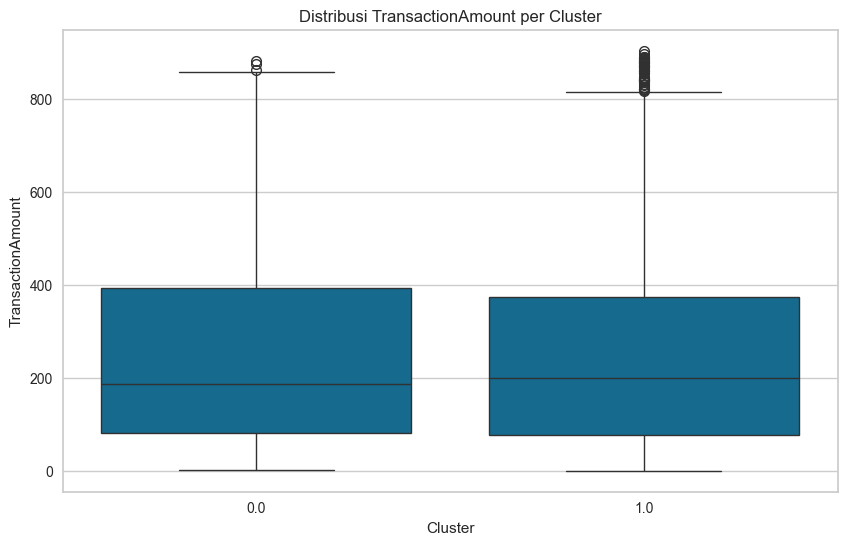

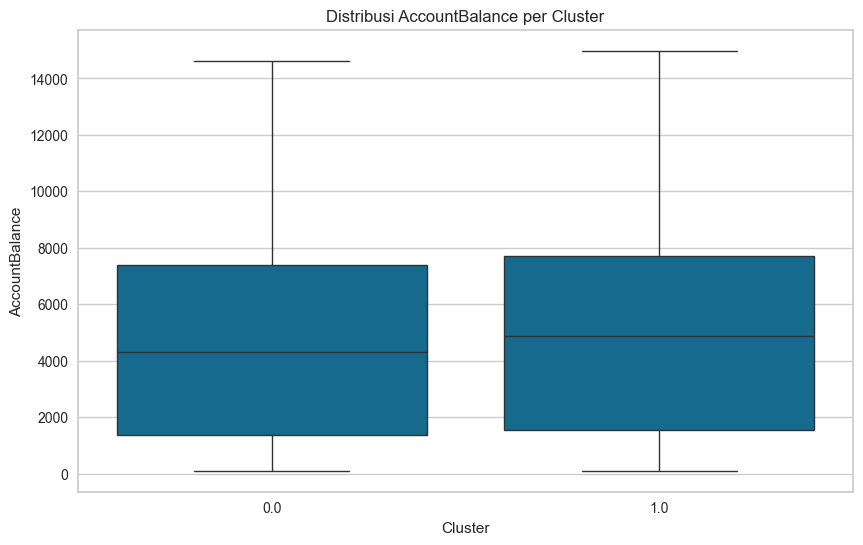

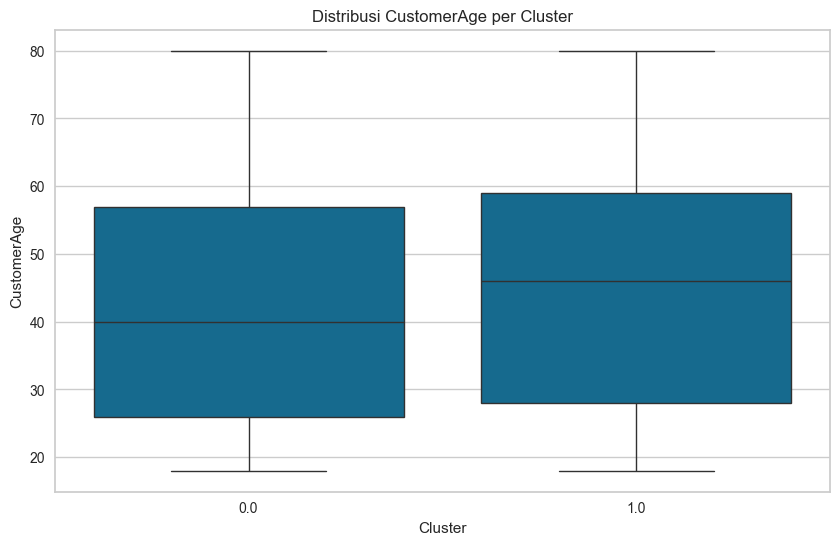

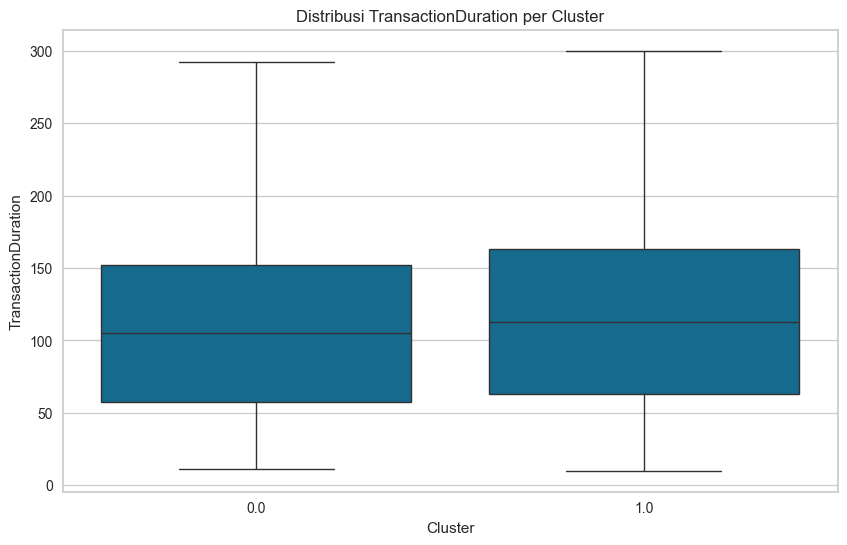

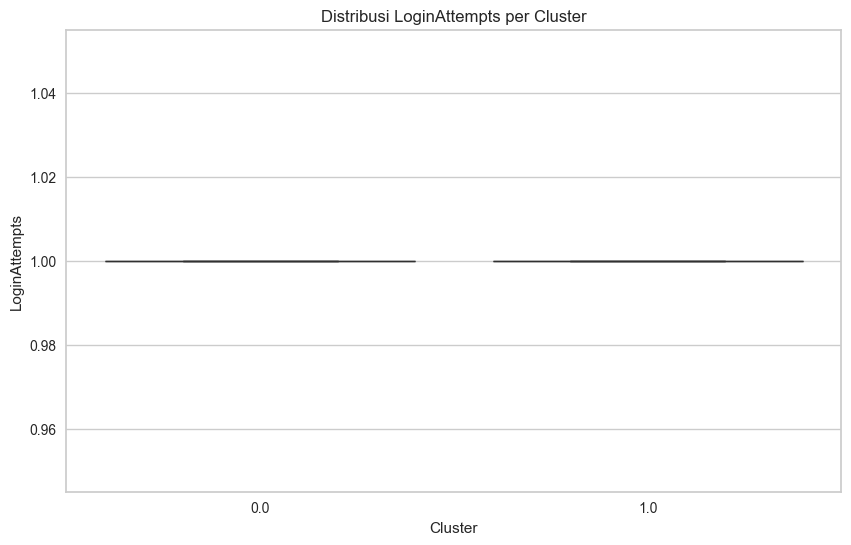

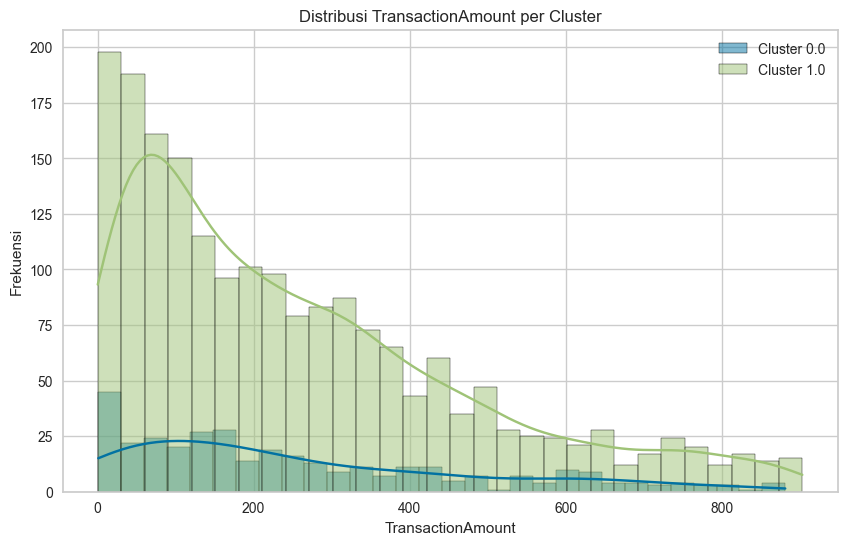

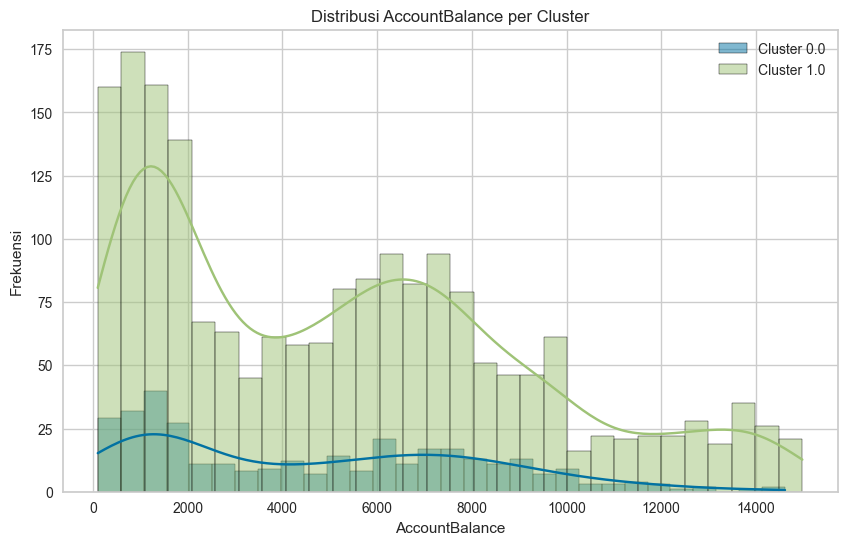

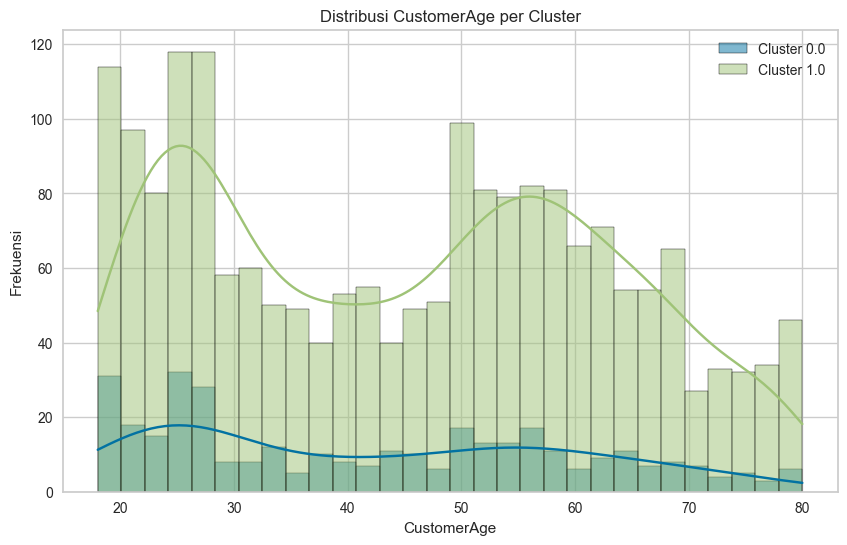

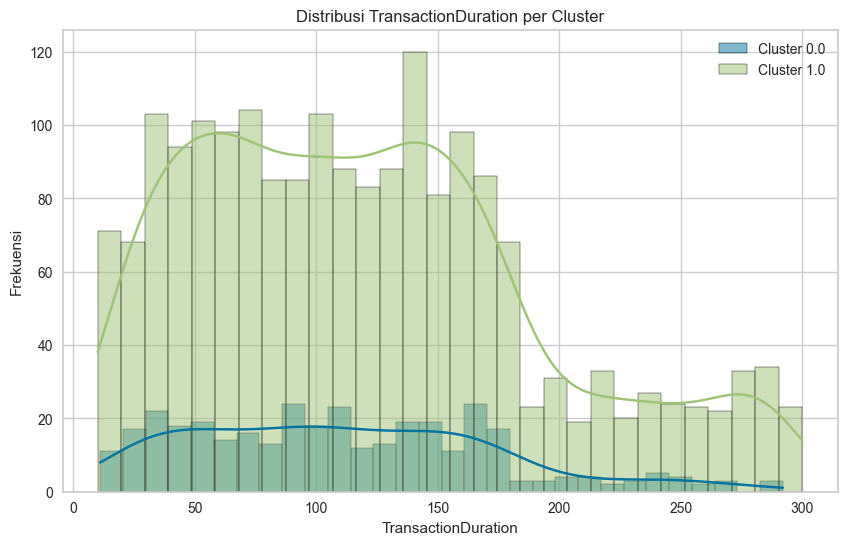

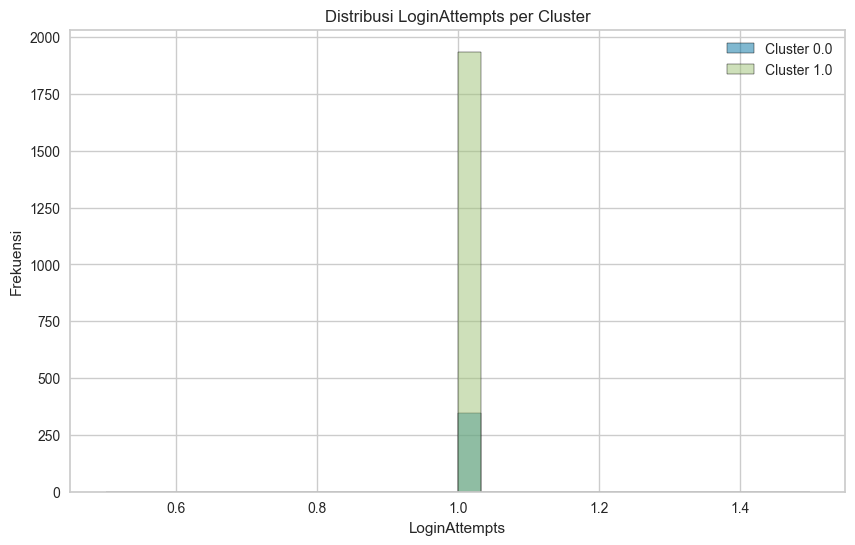

In [47]:

# Visualisasi distribusi fitur numerik dengan boxplot
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster_KMeans', y=feature, data=df_original)
    plt.title(f'Distribusi {feature} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

# Visualisasi distribusi fitur numerik dengan histogram
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    for cluster_id in df_original['Cluster_KMeans'].unique():
        subset = df_original[df_original['Cluster_KMeans'] == cluster_id]
        sns.histplot(subset[feature], bins=30, kde=True, label=f'Cluster {cluster_id}', alpha=0.5)
    plt.title(f'Distribusi {feature} per Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.show()

**Insight:**
- Berdasarkan visualisasi distribusi dari beberapa variabel terhadap cluster, dapat disimpulkan bahwa terdapat dua segmen utama dalam data. Cluster 1 (hijau) memiliki frekuensi transaksi yang lebih tinggi dengan jumlah transaksi yang lebih besar, saldo akun yang lebih tinggi, serta rentang usia yang lebih luas, menunjukkan bahwa kelompok ini kemungkinan terdiri dari pelanggan yang lebih aktif dan memiliki kapasitas finansial lebih besar. Sebaliknya, Cluster 0 (biru) memiliki distribusi yang lebih rendah pada setiap variabel, mengindikasikan bahwa kelompok ini mungkin terdiri dari pengguna dengan transaksi lebih kecil, saldo akun lebih rendah, serta aktivitas yang lebih sedikit. Distribusi upaya login (LoginAttempts) yang seragam menunjukkan bahwa sebagian besar pengguna hanya melakukan satu kali login, sehingga tidak terlalu membedakan antara kedua cluster dalam aspek ini.


Distribusi Fitur Kategorikal per Cluster



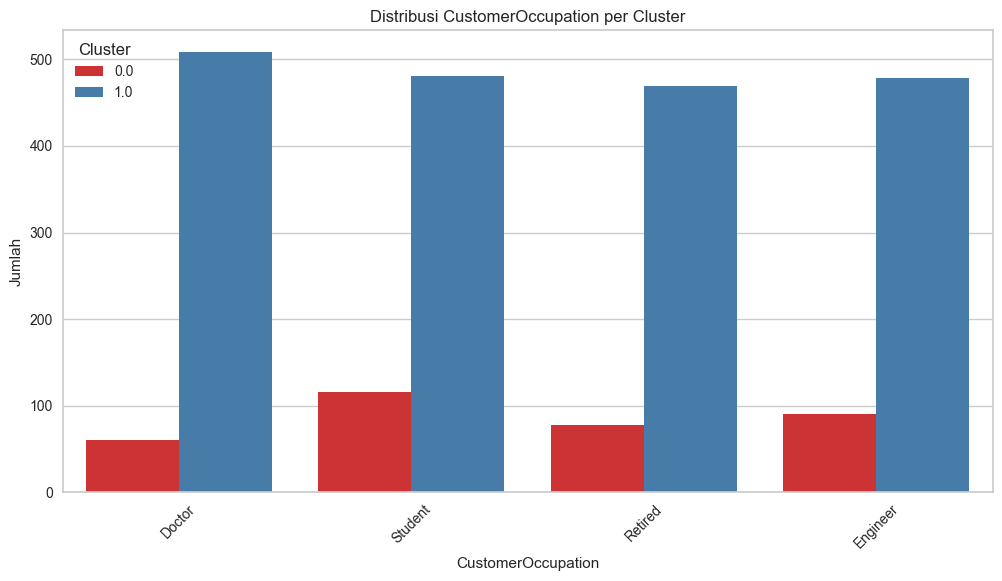

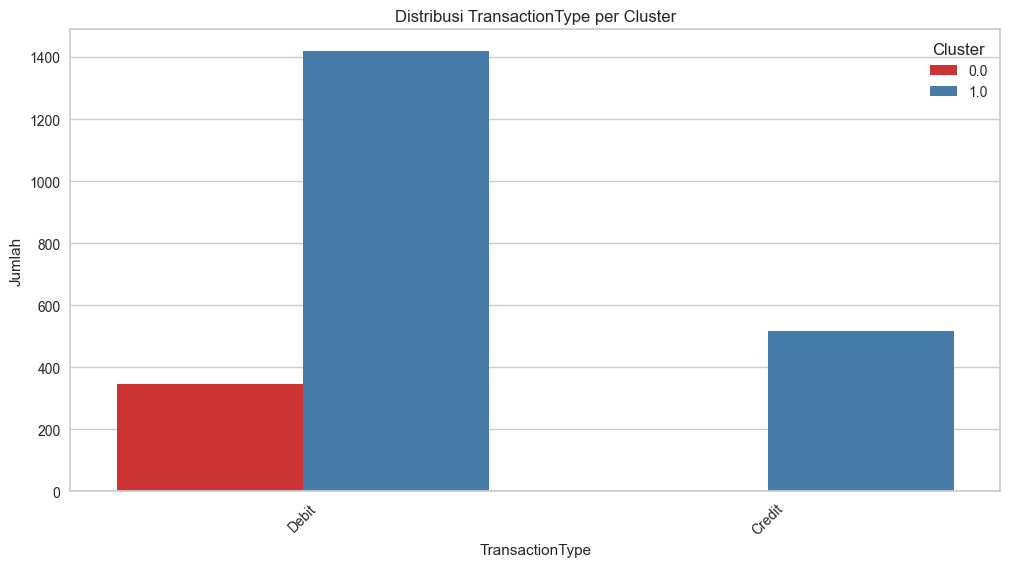

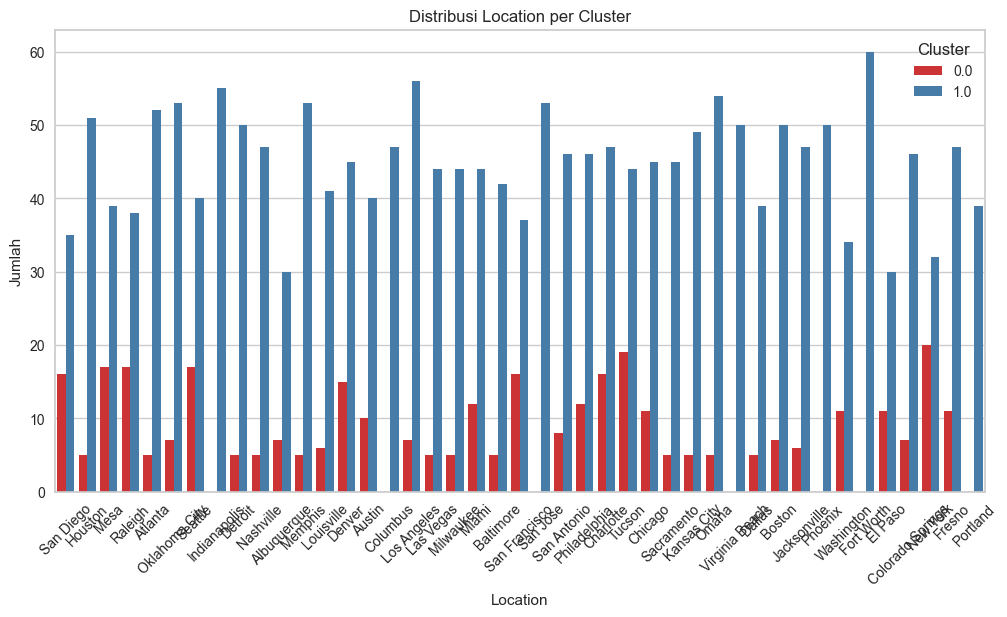

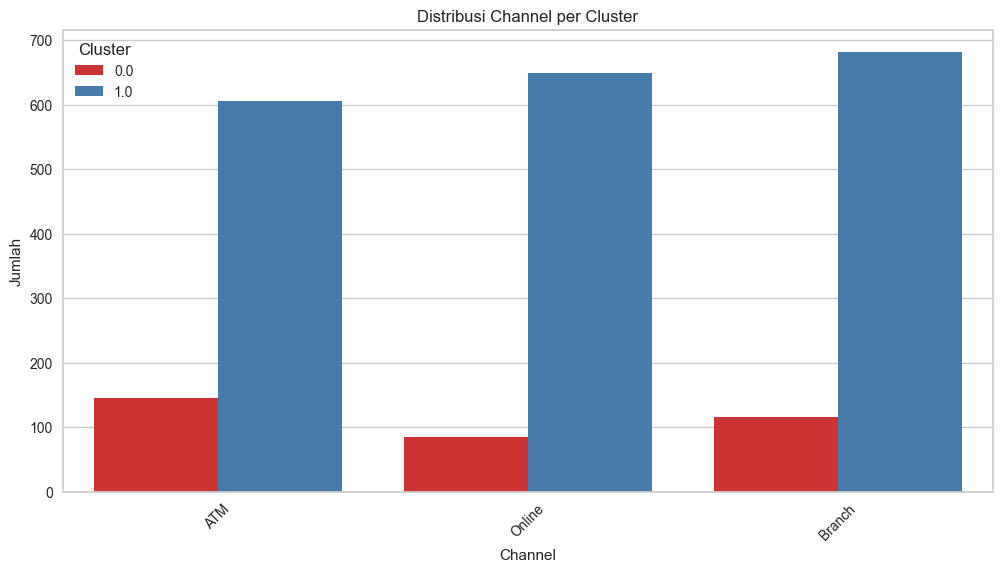


Ringkasan Distribusi

Distribusi fitur numerik menunjukkan perbedaan yang jelas antara cluster dalam hal nilai transaksi, saldo akun, usia pelanggan, durasi transaksi, dan jumlah percobaan login. Distribusi fitur kategorikal menunjukkan variasi dalam pekerjaan pelanggan, jenis transaksi, dan lokasi, yang dapat membantu memahami karakteristik masing-masing cluster lebih lanjut.


In [48]:
#  Distribusi Fitur Kategorikal per Cluster
print("\nDistribusi Fitur Kategorikal per Cluster\n")

# Visualisasi distribusi fitur kategorikal dengan countplot
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_original, x=feature, hue='Cluster_KMeans', palette='Set1')
    plt.title(f'Distribusi {feature} per Cluster')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.show()

# 3. Ringkasan Distribusi
print("\nRingkasan Distribusi\n")
print("Distribusi fitur numerik menunjukkan perbedaan yang jelas antara cluster dalam hal nilai transaksi, saldo akun, usia pelanggan, durasi transaksi, dan jumlah percobaan login. Distribusi fitur kategorikal menunjukkan variasi dalam pekerjaan pelanggan, jenis transaksi, dan lokasi, yang dapat membantu memahami karakteristik masing-masing cluster lebih lanjut.")


**Insight:**
- Dari keempat grafik yang ditampilkan, terlihat bahwa mayoritas transaksi dalam dataset didominasi oleh cluster 1 (biru), sedangkan cluster 0 (merah) memiliki jumlah yang jauh lebih kecil. Dari segi pekerjaan, semua kategori (Doctor, Student, Retired, Engineer) lebih banyak berasal dari cluster 1. Pada jenis transaksi, transaksi debit mendominasi, terutama di cluster 1, sementara cluster 0 juga memiliki kontribusi tetapi lebih kecil. Dari sisi lokasi, pola yang sama terlihat, di mana cluster 1 mendominasi hampir di semua lokasi. Begitu pula dengan saluran transaksi (ATM, Online, dan Branch), yang semuanya lebih sering digunakan oleh cluster 1 dibandingkan cluster 0. Secara keseluruhan, analisis ini menunjukkan bahwa kelompok utama dalam dataset cenderung berasal dari cluster 1, yang memiliki aktivitas transaksi yang lebih tinggi di berbagai aspek.


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Transaction Amount**: 259.95 (Min: 0.99, Max: 881.32)
Menunjukkan bahwa pelanggan dalam cluster ini memiliki tingkat transaksi yang cukup rendah hingga menengah.

- **Rata-rata Account Balance:** 4,642.34 (Min: 102.2, Max: 14,611.9)
Mengindikasikan kapasitas finansial pelanggan yang terbatas hingga menengah.

- **Dominan Pekerjaan (Customer Occupation):** Student
Mayoritas pelanggan dalam cluster ini adalah mahasiswa, yang umumnya memiliki daya beli terbatas dan lebih cenderung melakukan transaksi dalam jumlah kecil.

- **Analisis:**
Cluster ini mencakup pelanggan dengan kapasitas finansial yang cenderung lebih rendah, dengan rata-rata saldo rekening yang tidak terlalu besar dan transaksi yang relatif kecil. Dengan dominasi mahasiswa, pelanggan dalam cluster ini kemungkinan lebih berhati-hati dalam mengelola pengeluaran mereka. Strategi bisnis yang cocok untuk segmen ini bisa berupa penawaran tabungan dengan bunga kompetitif atau program cashback untuk meningkatkan loyalitas.


## Cluster 1:
- **Rata-rata Transaction Amount:** 254.73 (Min: 0.26, Max: 903.19)
Menunjukkan bahwa pelanggan dalam cluster ini memiliki tingkat transaksi yang beragam, dengan nilai transaksi lebih besar dibandingkan cluster sebelumnya.

- **Rata-rata Account Balance:** 5,204.84 (Min: 101.25, Max: 14,977.99)
Mengindikasikan kapasitas finansial yang lebih tinggi dibandingkan dengan Cluster 0.

- **Dominan Pekerjaan (Customer Occupation):** Doctor
Mayoritas pelanggan dalam cluster ini adalah dokter, yang biasanya memiliki penghasilan lebih tinggi dan daya beli yang lebih besar.

- **Analisis:**
Cluster ini terdiri dari pelanggan dengan kapasitas finansial yang lebih tinggi dibandingkan Cluster 0. Dengan pekerjaan dominan sebagai dokter, pelanggan dalam cluster ini kemungkinan besar memiliki stabilitas keuangan yang lebih baik, yang tercermin dari saldo rekening dan pola transaksi mereka. Strategi bisnis yang dapat diterapkan meliputi penawaran layanan investasi, kartu kredit premium, atau program loyalitas berbasis transaksi besar untuk meningkatkan retensi pelanggan.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [49]:
df_original.to_csv('Dataset_clustering.csv', index=False)
print("Data telah diekspor ke 'Dataset_clustering.csv'")

Data telah diekspor ke 'Dataset_clustering.csv'
